# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [16]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.utils import resample
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score



In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

<Axes: xlabel='fraud'>

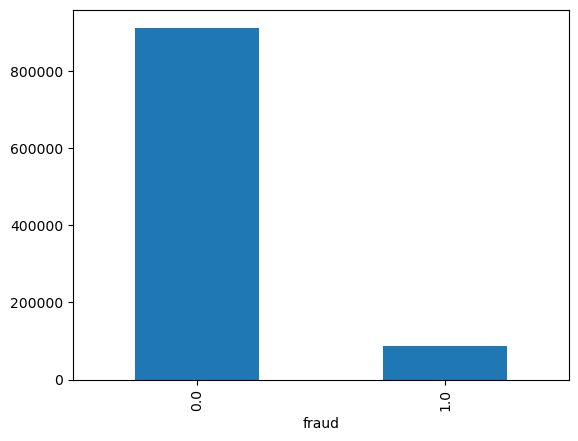

In [7]:
fraud = df['fraud'].value_counts()
fraud.plot(kind="bar")


In [8]:
features = df.drop(columns='fraud')
target = df['fraud']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size= 0.2, random_state= 0)

In [11]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
log_reg.score(X_test_scaled, y_test)

0.959065

In [17]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    730058
         1.0       0.89      0.61      0.72     69942

    accuracy                           0.96    800000
   macro avg       0.93      0.80      0.85    800000
weighted avg       0.96      0.96      0.96    800000



In [ ]:
##Oversampling

In [18]:
train = pd.DataFrame(X_train_scaled, columns = X_train.columns)
train["fraud"] = y_train.values
fraud = train[train["fraud"] == 1]
no_fraud = train[train["fraud"] == 0]
yes_fraud_oversampled = resample(fraud, replace=True, n_samples = len(no_fraud), random_state=0)
train_over = pd.concat([yes_fraud_oversampled, no_fraud])

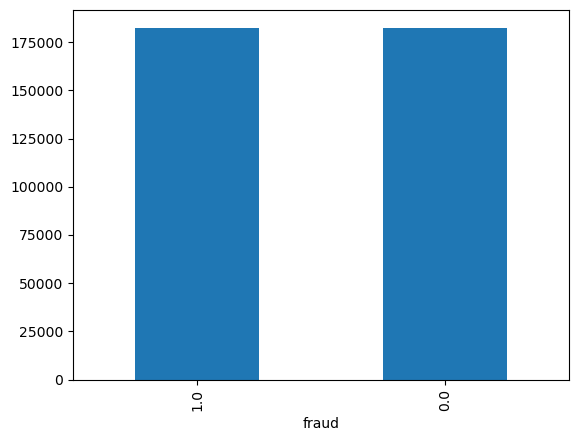

In [19]:
fraud_plt = train_over["fraud"].value_counts()
fraud_plt.plot(kind="bar")
plt.show()

In [20]:
X_train_over = train_over.drop(columns = ["fraud"])
y_train_over = train_over["fraud"]

log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)

LogisticRegression()

In [21]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

c:\Users\rergu\rerguner.anaconda\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    730058
         1.0       0.58      0.95      0.72     69942

    accuracy                           0.94    800000
   macro avg       0.79      0.94      0.84    800000
weighted avg       0.96      0.94      0.94    800000



In [ ]:
### Undersample

In [25]:
train = pd.DataFrame(X_train_scaled, columns = X_train.columns)
train["fraud"] = y_train.values
fraud = train[train["fraud"] == 1]
no_fraud = train[train["fraud"] == 0]
no_fraud_undersampled = resample(no_fraud, replace=True, n_samples = len(fraud), random_state=0)
train_under = pd.concat([no_fraud_undersampled, fraud])

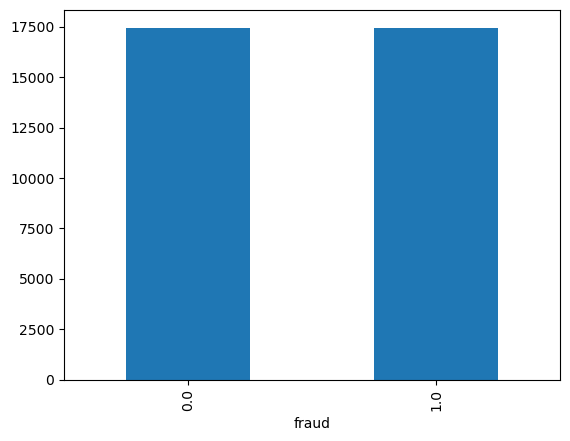

In [26]:
fraud_plt = train_under["fraud"].value_counts()
fraud_plt.plot(kind="bar")
plt.show()

In [27]:
X_train_under = train_under.drop(columns = ["fraud"])
y_train_under = train_under["fraud"]

log_reg = LogisticRegression()
log_reg.fit(X_train_under, y_train_under)

LogisticRegression()

In [28]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

c:\Users\rergu\rerguner.anaconda\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    730058
         1.0       0.58      0.95      0.72     69942

    accuracy                           0.94    800000
   macro avg       0.79      0.94      0.84    800000
weighted avg       0.96      0.94      0.94    800000



In [30]:
### SMOTE

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 1,sampling_strategy=1.0)
X_train_sm,y_train_sm = sm.fit_resample(X_train_scaled,y_train)
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

c:\Users\rergu\rerguner.anaconda\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    730058
         1.0       0.58      0.95      0.72     69942

    accuracy                           0.94    800000
   macro avg       0.79      0.94      0.84    800000
weighted avg       0.96      0.94      0.94    800000

